# Important Libraries 

In [54]:
## Used for data manipulation
import pandas as pd 
## Used for numerical data
import numpy as np   

## Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Handling Missing Values 
from sklearn.impute import KNNImputer

## Scale the data
from sklearn.preprocessing import StandardScaler

## Sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

## Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Read Dataset

In [3]:
## read dataset
environmental_data = pd.read_csv('environmental_data.csv')

In [4]:
## show first 5 rows 
environmental_data.head()

,Date,Temperature (°C),Humidity (%),Wind Speed (km/h),Air Quality Index (AQI),Impact Score
0,2020-01-01,24.967142,41.635526,14.026514,53.958333,378.542462
1,2020-01-02,NaN,56.864651,14.679059,37.850554,159.454149
2,2020-01-03,26.476885,47.242193,15.458762,41.912760,NaN
3,2020-01-04,NaN,51.292148,16.261202,36.274417,497.770928
4,2020-01-05,17.658466,68.828676,14.418855,21.346574,904.784841


# Exploratory Data Analysis (EDA)

In [5]:
# Data Info (Data tpes, Count and Nulls)
environmental_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     1461 non-null   object 
 1   Temperature (°C)         1318 non-null   float64
 2   Humidity (%)             1322 non-null   float64
 3   Wind Speed (km/h)        1321 non-null   float64
 4   Air Quality Index (AQI)  1319 non-null   float64
 5   Impact Score             1320 non-null   float64
dtypes: float64(5), object(1)
memory usage: 68.6+ KB


> ### We noticed that the `Date Column` is type `Object` so we should convert it to `DateTime`

In [6]:
# Summary statistics
environmental_data.describe()

,Temperature (°C),Humidity (%),Wind Speed (km/h),Air Quality Index (AQI),Impact Score
count,1318.000000,1322.000000,1321.000000,1319.000000,1320.000000
mean,20.554804,60.104196,14.776431,49.542244,573.698854
std,9.804638,14.662479,5.086361,19.683608,325.573377
min,-12.412673,14.707318,-0.038162,-13.534076,5.336334
25%,13.763881,50.354508,11.316149,36.946457,292.431520
50%,20.576109,59.909120,14.843983,49.575104,542.649490
75%,26.850268,69.993232,18.015473,63.046365,944.980792
max,58.527315,118.893566,31.215465,112.258204,1000.000000


> ### The values in each column of `Feature vary` so `Feature Scaling` is necessary

In [7]:
# Check for missing values
missing_values = environmental_data.isnull().sum()
missing_values

Date                         0
Temperature (°C)           143
Humidity (%)               139
Wind Speed (km/h)          140
Air Quality Index (AQI)    142
Impact Score               141
dtype: int64

> ### Dealing with the Missing values with one of the tow methods `` or ``

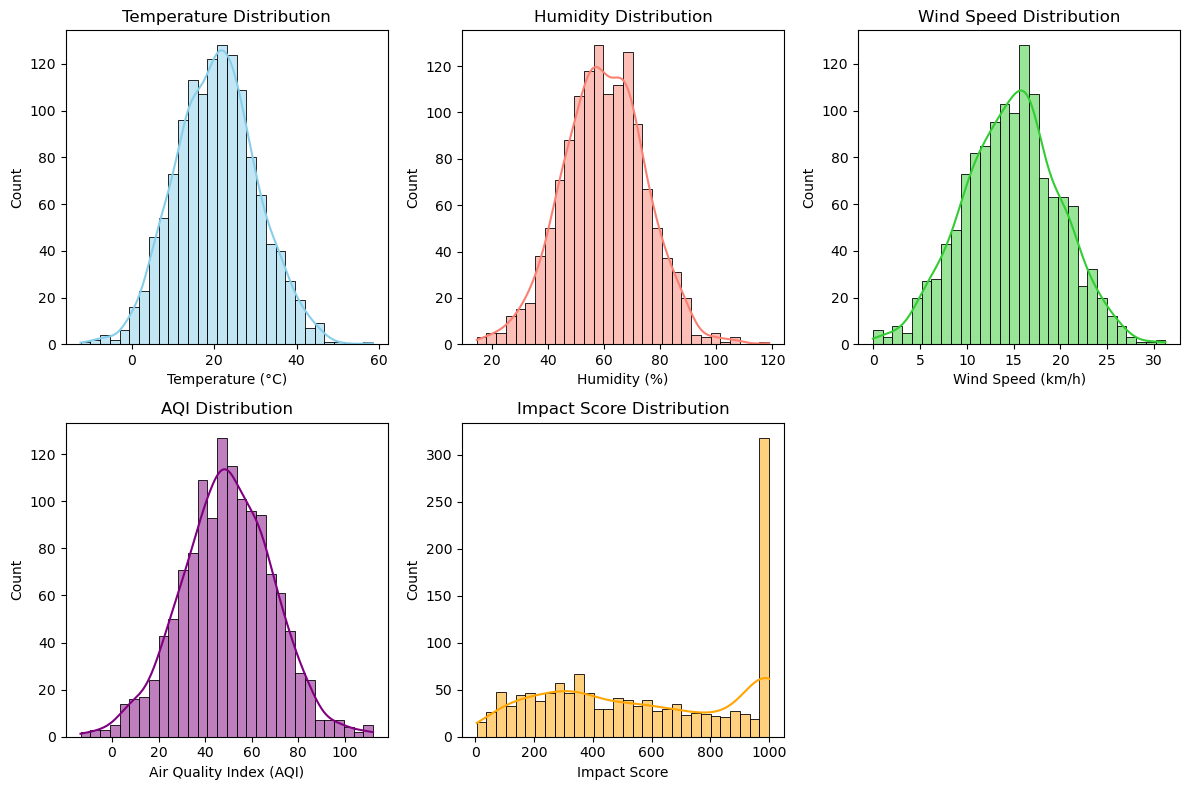

In [8]:
# Histplot for every feature
plt.figure(figsize=(12, 8))

# Plot distributions
plt.subplot(2, 3, 1)
sns.histplot(environmental_data['Temperature (°C)'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('Temperature Distribution')

plt.subplot(2, 3, 2)
sns.histplot(environmental_data['Humidity (%)'].dropna(), kde=True, bins=30, color='salmon')
plt.title('Humidity Distribution')

plt.subplot(2, 3, 3)
sns.histplot(environmental_data['Wind Speed (km/h)'].dropna(), kde=True, bins=30, color='limegreen')
plt.title('Wind Speed Distribution')

plt.subplot(2, 3, 4)
sns.histplot(environmental_data['Air Quality Index (AQI)'].dropna(), kde=True, bins=30, color='purple')
plt.title('AQI Distribution')

plt.subplot(2, 3, 5)
sns.histplot(environmental_data['Impact Score'].dropna(), kde=True, bins=30, color='orange')
plt.title('Impact Score Distribution')

plt.tight_layout()
plt.show()


> ### The data for `Temperature (°C)`, `Humidity (%)`, `Wind Speed (km/h)`, and `Air Quality Index (AQI)` follow a Normal Distribution, while the `Impact Score` does not. 

> ### Data Have Some Outliers

In [9]:
## Calculate the correlation matrix between features and target
correlation_matrix = environmental_data.drop('Date', axis=1).corr()
correlation_matrix

,Temperature (°C),Humidity (%),Wind Speed (km/h),Air Quality Index (AQI),Impact Score
Temperature (°C),1.000000,-0.002361,0.033257,0.017922,0.045885
Humidity (%),-0.002361,1.000000,-0.018725,-0.000822,0.008955
Wind Speed (km/h),0.033257,-0.018725,1.000000,-0.000911,-0.014439
Air Quality Index (AQI),0.017922,-0.000822,-0.000911,1.000000,-0.050612
Impact Score,0.045885,0.008955,-0.014439,-0.050612,1.000000


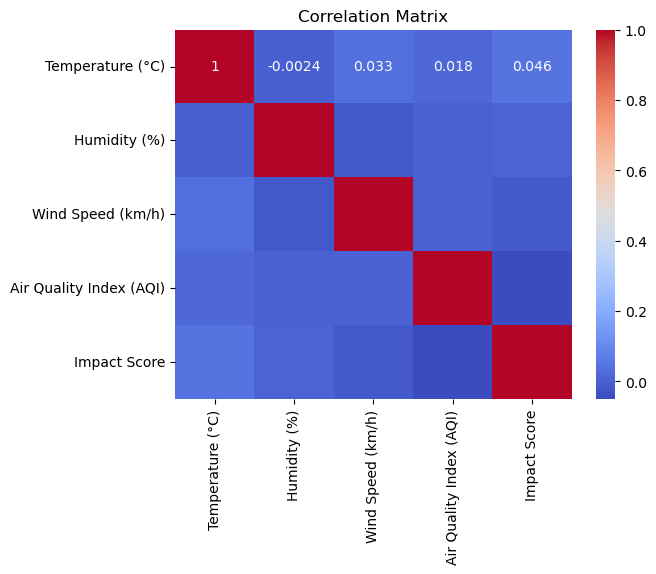

In [10]:
#Plotting correlation matrix 
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True)
plt.title('Correlation Matrix')
plt.show()

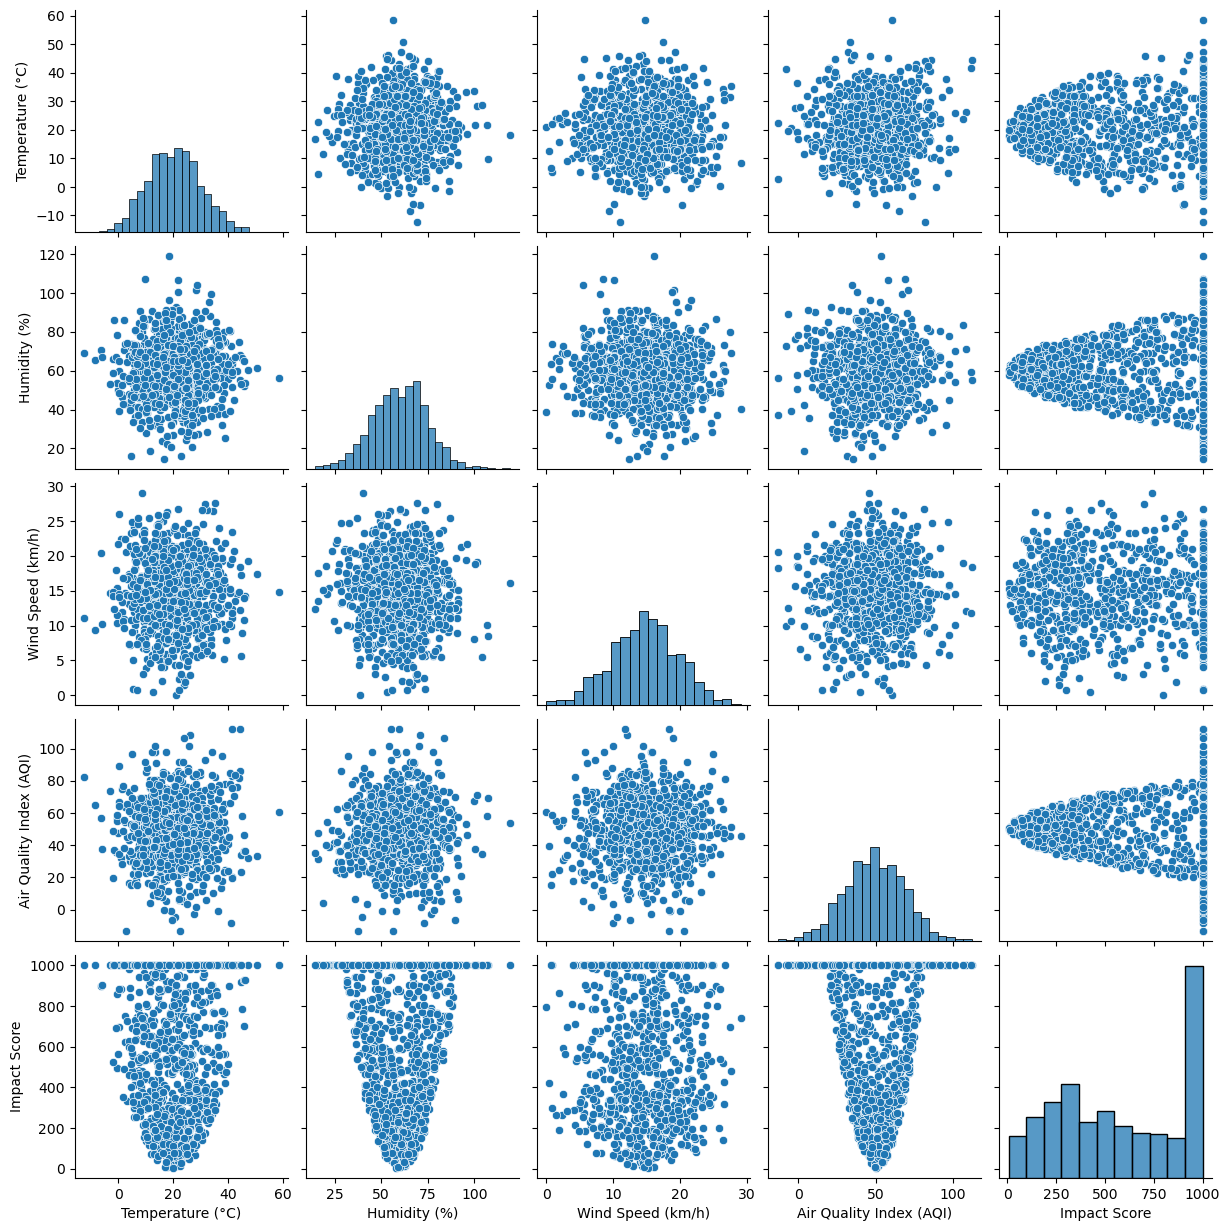

In [11]:
# Relationships between features and impact scores
sns.pairplot(environmental_data.dropna(), vars=['Temperature (°C)', 'Humidity (%)', 'Wind Speed (km/h)', 'Air Quality Index (AQI)', 'Impact Score'])
plt.show()

> ### `Temperature` has a `positive` correlation with `Impact Score`, `Humidity` has a very `small negative` correlation with `Impact Score`, `Wind Speed` shows a very `weak negative` correlation with `Impact Score` and `Air Quality Index` has a `negative` correlation with `Impact Score`

In [13]:
environmental_data['Month'] = pd.to_datetime(environmental_data['Date']).dt.month

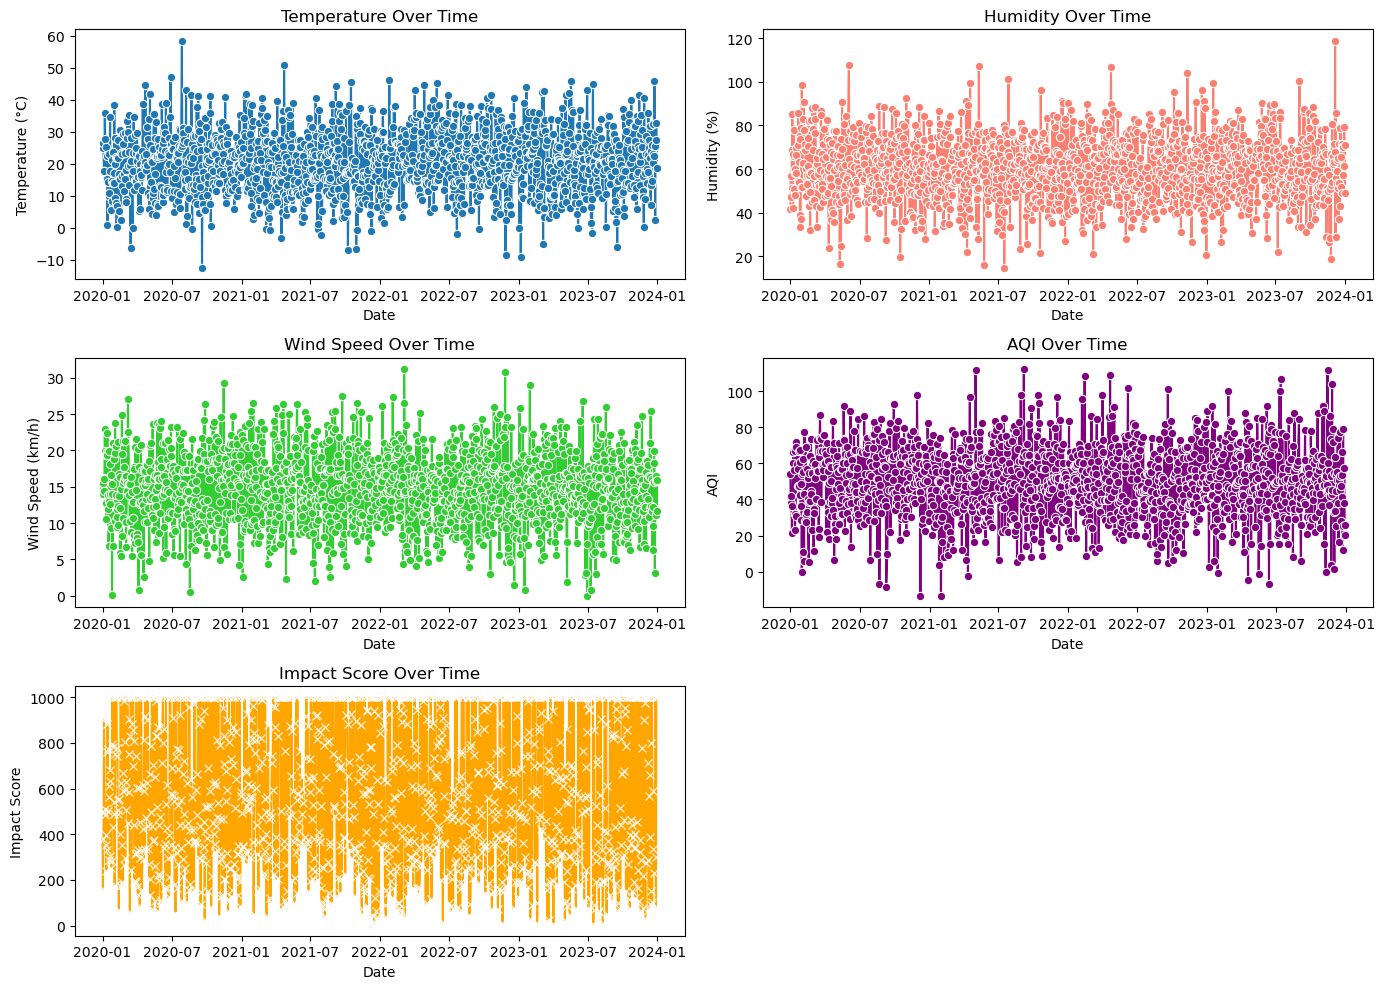

In [24]:
# Time series plots
plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
sns.lineplot(x='Date', y='Temperature (°C)', data=environmental_data, marker='o')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

plt.subplot(3, 2, 2)
sns.lineplot(x='Date', y='Humidity (%)', data=environmental_data, marker='o', color='salmon')
plt.title('Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')

plt.subplot(3, 2, 3)
sns.lineplot(x='Date', y='Wind Speed (km/h)', data=environmental_data, marker='o', color='limegreen')
plt.title('Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed (km/h)')

plt.subplot(3, 2, 4)
sns.lineplot(x='Date', y='Air Quality Index (AQI)', data=environmental_data, marker='o', color='purple')
plt.title('AQI Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')

plt.subplot(3, 2, 5)
sns.lineplot(x='Date', y='Impact Score', data=environmental_data, marker='x', color='orange')
plt.title('Impact Score Over Time')
plt.xlabel('Date')
plt.ylabel('Impact Score')

plt.tight_layout()
plt.show()

> ### Plot shows relatively `constant temperature` `~10°C variation`, `humidity` `~20% variation`, and high `impact score` throughout `4 years`. `Wind speed` is most variable `up to 30 km/h gusts`


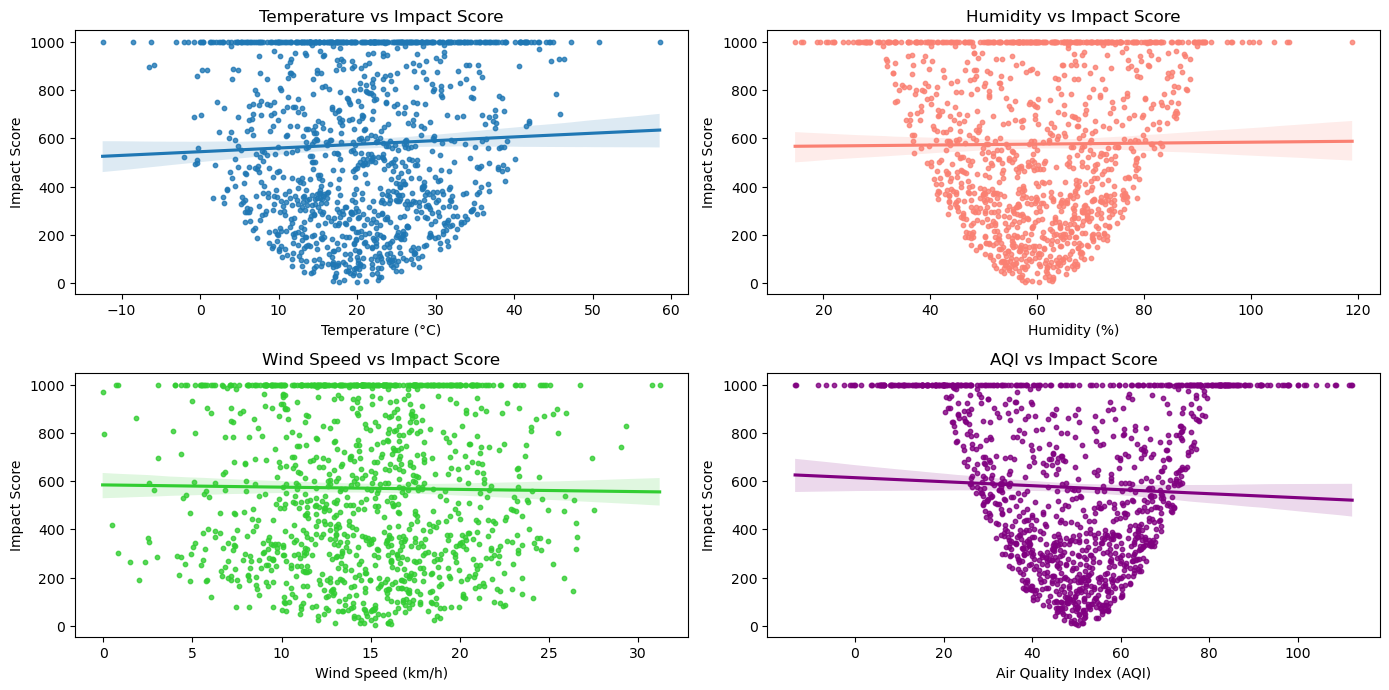

In [25]:
# Scatter plots with regression lines for each parameter against impact score
plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
sns.regplot(x='Temperature (°C)', y='Impact Score', data=environmental_data, scatter_kws={'s':10})
plt.title('Temperature vs Impact Score')
plt.xlabel('Temperature (°C)')
plt.ylabel('Impact Score')

plt.subplot(3, 2, 2)
sns.regplot(x='Humidity (%)', y='Impact Score', data=environmental_data, scatter_kws={'s':10}, color='salmon')
plt.title('Humidity vs Impact Score')
plt.xlabel('Humidity (%)')
plt.ylabel('Impact Score')

plt.subplot(3, 2, 3)
sns.regplot(x='Wind Speed (km/h)', y='Impact Score', data=environmental_data, scatter_kws={'s':10}, color='limegreen')
plt.title('Wind Speed vs Impact Score')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Impact Score')

plt.subplot(3, 2, 4)
sns.regplot(x='Air Quality Index (AQI)', y='Impact Score', data=environmental_data, scatter_kws={'s':10}, color='purple')
plt.title('AQI vs Impact Score')
plt.xlabel('Air Quality Index (AQI)')
plt.ylabel('Impact Score')

plt.tight_layout()
plt.show()


> ### Plot shows weak correlations between temperature/humidity, wind/air quality.

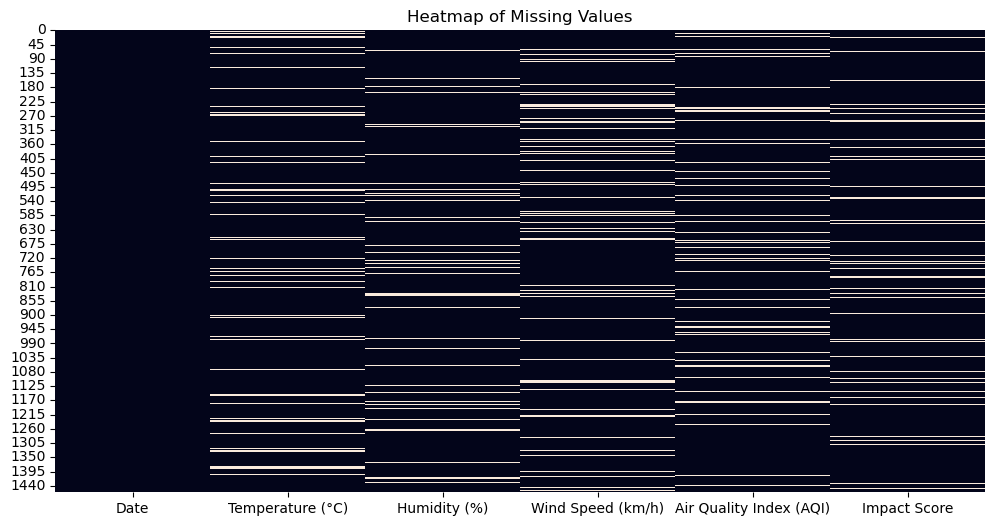

In [27]:
# Distribution of missing values throughout the data
plt.figure(figsize=(12, 6))
sns.heatmap(environmental_data.isnull(), cbar=False)
plt.title('Heatmap of Missing Values')
plt.show()

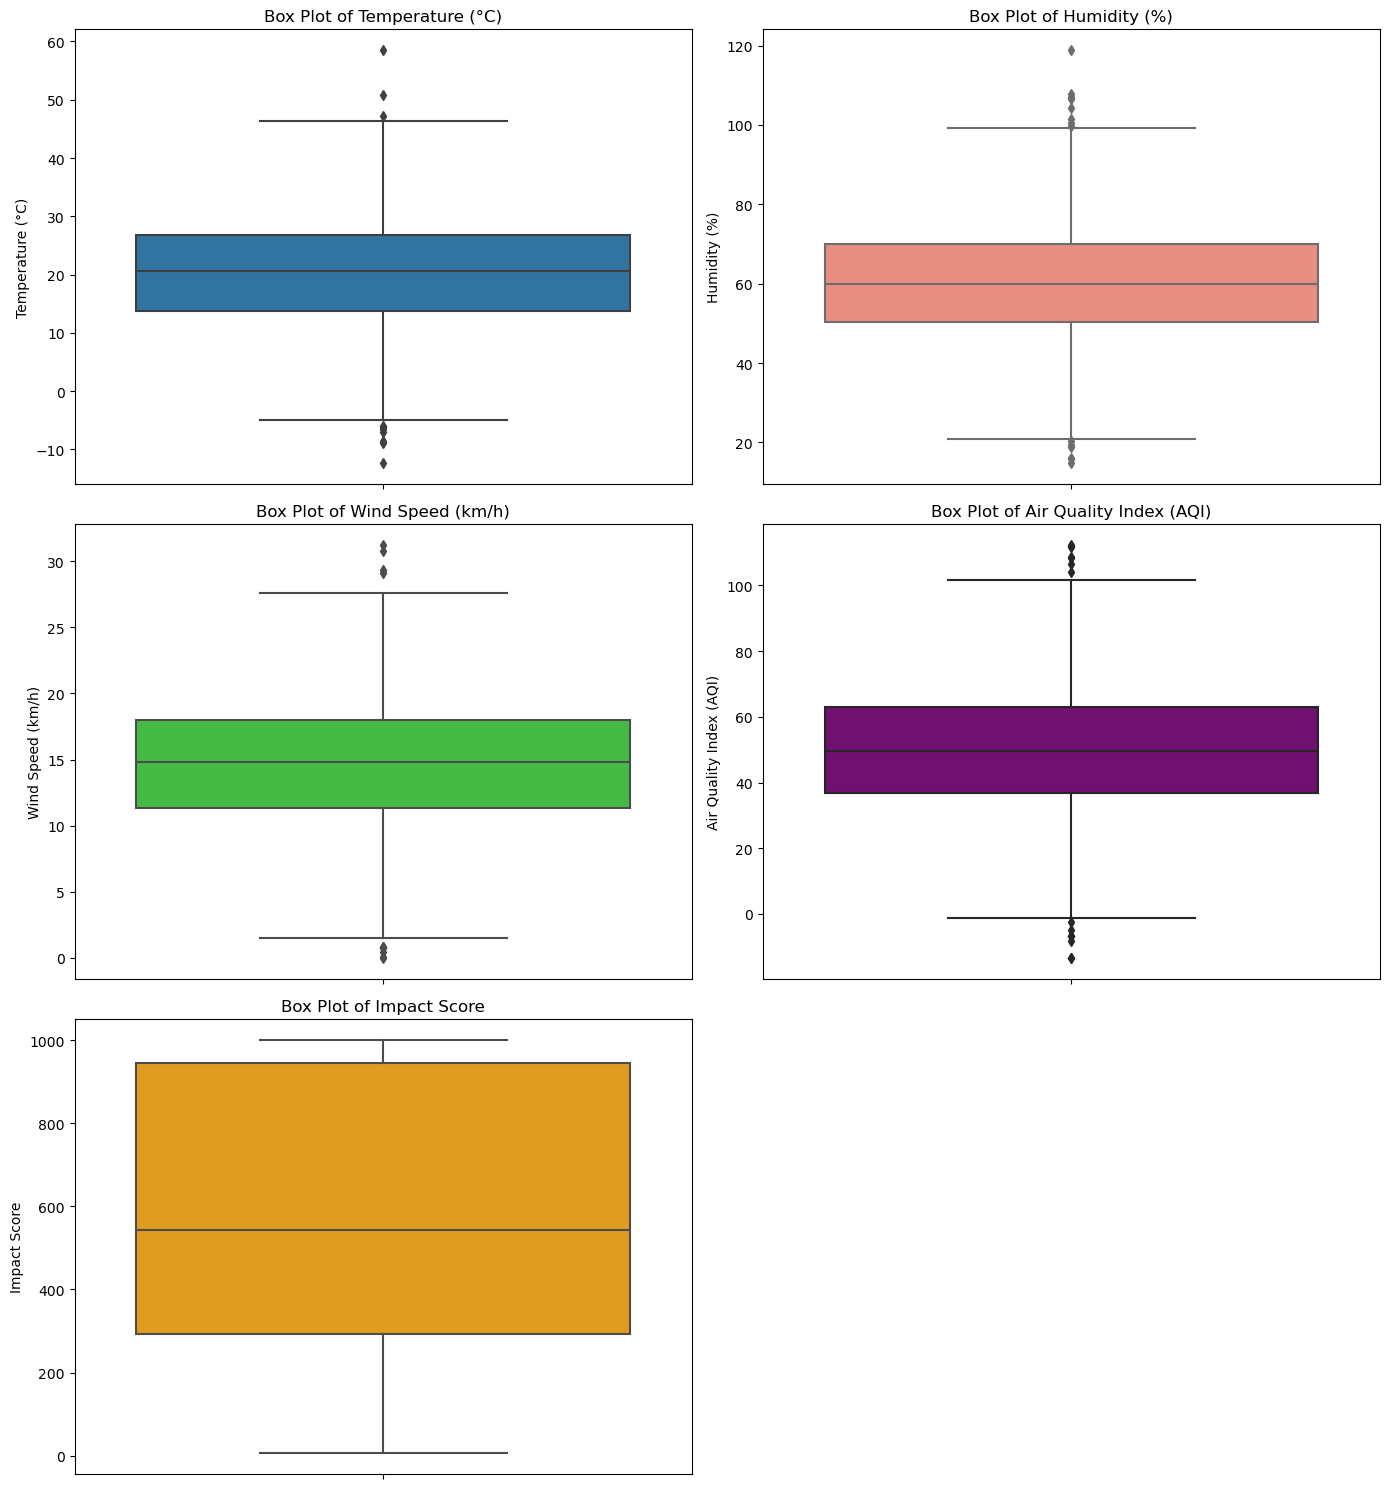

In [22]:
# Box plots for each Fearture to show outliers
plt.figure(figsize=(14, 15))

plt.subplot(3, 2, 1)
sns.boxplot(y='Temperature (°C)', data=environmental_data)
plt.title('Box Plot of Temperature (°C)')
plt.ylabel('Temperature (°C)')

plt.subplot(3, 2, 2)
sns.boxplot(y='Humidity (%)', data=environmental_data, color='salmon')
plt.title('Box Plot of Humidity (%)')
plt.ylabel('Humidity (%)')

plt.subplot(3, 2, 3)
sns.boxplot(y='Wind Speed (km/h)', data=environmental_data, color='limegreen')
plt.title('Box Plot of Wind Speed (km/h)')
plt.ylabel('Wind Speed (km/h)')

plt.subplot(3, 2, 4)
sns.boxplot(y='Air Quality Index (AQI)', data=environmental_data, color='purple')
plt.title('Box Plot of Air Quality Index (AQI)')
plt.ylabel('Air Quality Index (AQI)')

plt.subplot(3, 2, 5)
sns.boxplot(y='Impact Score', data=environmental_data, color='orange')
plt.title('Box Plot of Impact Score')
plt.ylabel('Impact Score')

plt.tight_layout()
plt.show()


> ### Box plots reveal median values and data distribution for `temperature`, `humidity`, `wind speed`, `AQI`, and `impact score`. `AQI` shows variation

#### Cast `Date` Column To `DateTime` Type and Generate `Month` Column

In [25]:
# Parse 'Date' as datetime and extract the month
environmental_data['Date'] = pd.to_datetime(environmental_data['Date'])

In [27]:
# Generate a `Month` Column to understand data more 
environmental_data['Month'] = environmental_data['Date'].dt.month

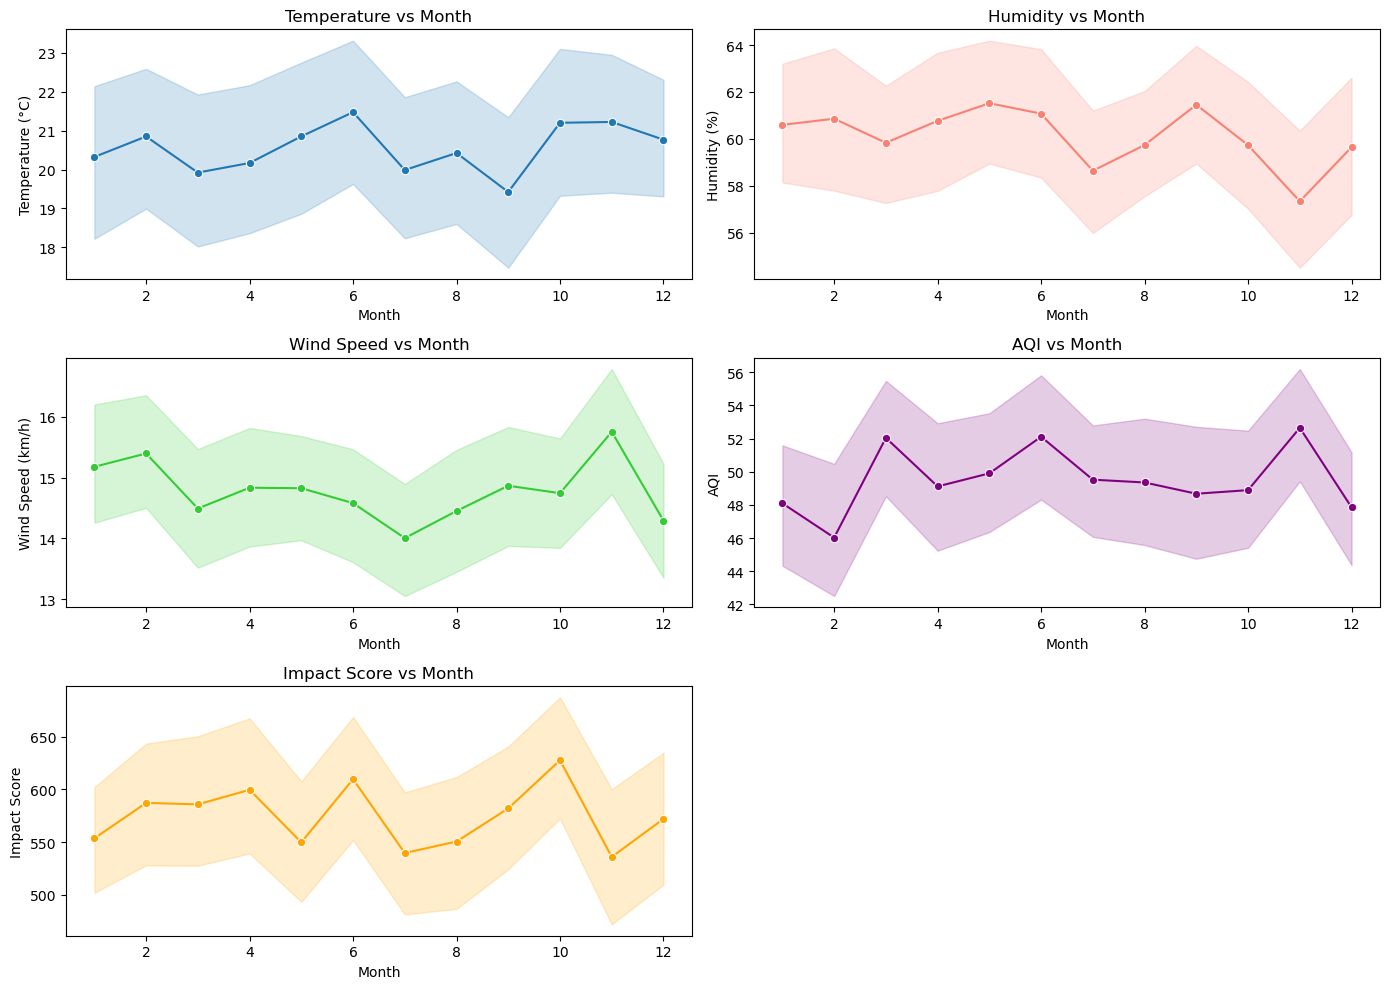

In [28]:
# Plot each feature against the month
plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
sns.lineplot(x='Month', y='Temperature (°C)', data=environmental_data, marker='o')
plt.title('Temperature vs Month')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')

plt.subplot(3, 2, 2)
sns.lineplot(x='Month', y='Humidity (%)', data=environmental_data, marker='o', color='salmon')
plt.title('Humidity vs Month')
plt.xlabel('Month')
plt.ylabel('Humidity (%)')

plt.subplot(3, 2, 3)
sns.lineplot(x='Month', y='Wind Speed (km/h)', data=environmental_data, marker='o', color='limegreen')
plt.title('Wind Speed vs Month')
plt.xlabel('Month')
plt.ylabel('Wind Speed (km/h)')

plt.subplot(3, 2, 4)
sns.lineplot(x='Month', y='Air Quality Index (AQI)', data=environmental_data, marker='o', color='purple')
plt.title('AQI vs Month')
plt.xlabel('Month')
plt.ylabel('AQI')

plt.subplot(3, 2, 5)
sns.lineplot(x='Month', y='Impact Score', data=environmental_data, marker='o', color='orange')
plt.title('Impact Score vs Month')
plt.xlabel('Month')
plt.ylabel('Impact Score')

plt.tight_layout()
plt.show()

> ### `Temperature` and `humidity` are highest in summer, lowest in winter. `Wind speed` is fairly constant. `AQI` is highest in winter, lowest in summer

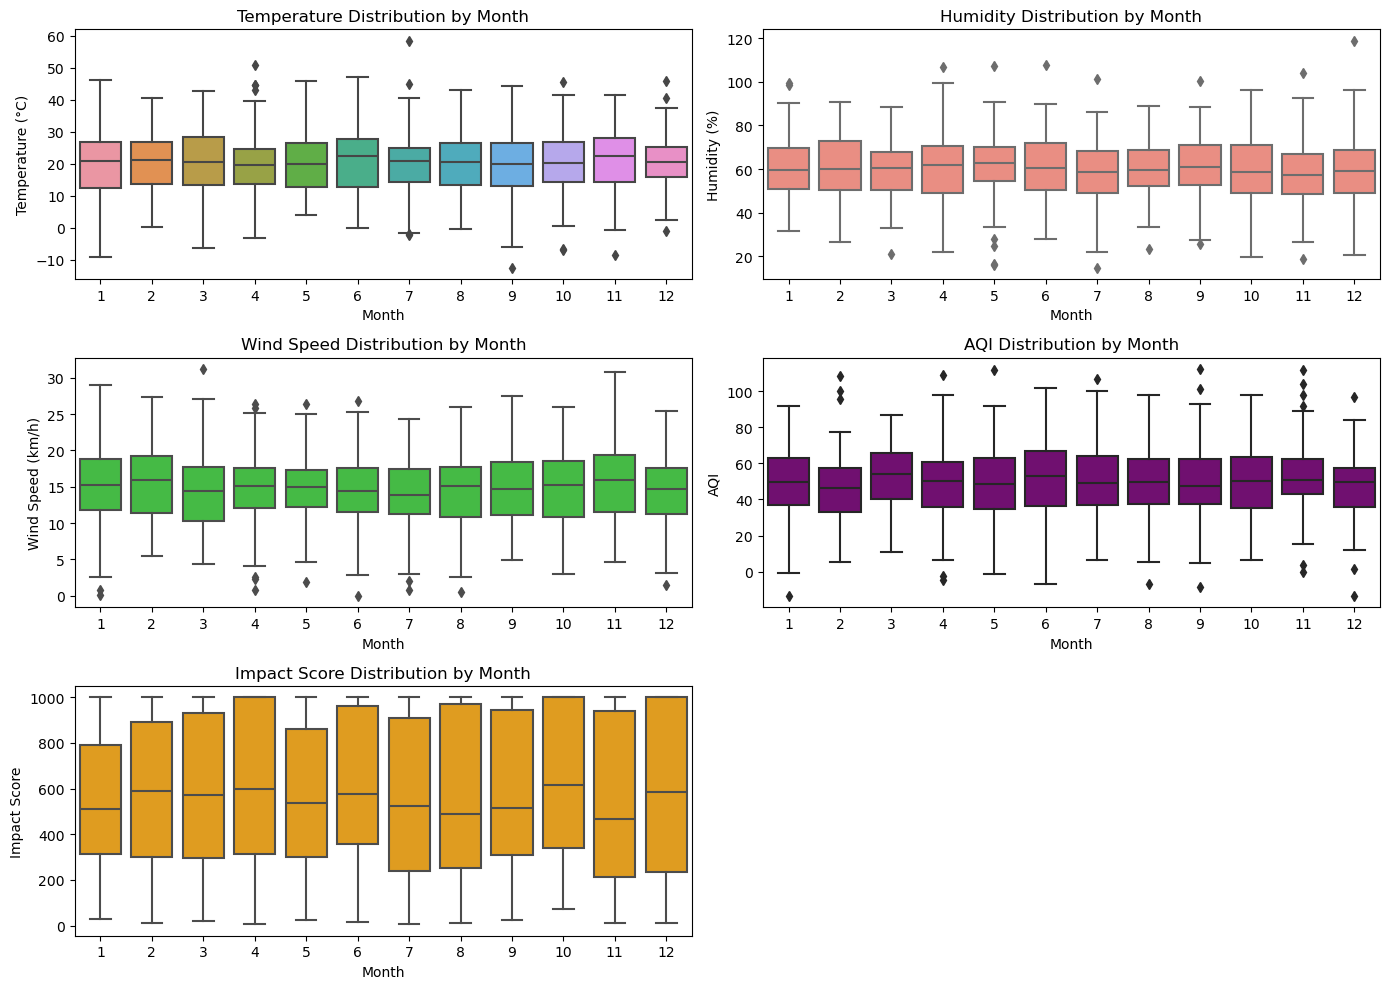

In [30]:
# Box plots for each Feature by month
plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
sns.boxplot(x='Month', y='Temperature (°C)', data=environmental_data)
plt.title('Temperature Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')

plt.subplot(3, 2, 2)
sns.boxplot(x='Month', y='Humidity (%)', data=environmental_data, color='salmon')
plt.title('Humidity Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Humidity (%)')

plt.subplot(3, 2, 3)
sns.boxplot(x='Month', y='Wind Speed (km/h)', data=environmental_data, color='limegreen')
plt.title('Wind Speed Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Wind Speed (km/h)')

plt.subplot(3, 2, 4)
sns.boxplot(x='Month', y='Air Quality Index (AQI)', data=environmental_data, color='purple')
plt.title('AQI Distribution by Month')
plt.xlabel('Month')
plt.ylabel('AQI')

plt.subplot(3, 2, 5)
sns.boxplot(x='Month', y='Impact Score', data=environmental_data, color='orange')
plt.title('Impact Score Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Impact Score')

plt.tight_layout()
plt.show()


> ### Patterns in `temperature` (high summer, low winter), `humidity` (high summer, low winter),`air quality` (low summer, high winter)

# Pre-process The Data

### Handeling Missing Values

In [37]:
# copy of the original data 
environmental_data_imputed = environmental_data.copy()

In [38]:
# Initialize the KNN Imputer with 5 neighbors
knn_imputer = KNNImputer(n_neighbors=5)

In [39]:
# Do KNN Imputation on the selected columns
environmental_data_imputed[['Temperature (°C)', 'Humidity (%)', 'Wind Speed (km/h)', 'Air Quality Index (AQI)', 'Impact Score']] = knn_imputer.fit_transform(
    environmental_data[['Temperature (°C)', 'Humidity (%)', 'Wind Speed (km/h)', 'Air Quality Index (AQI)', 'Impact Score']]
)

In [40]:
# Check Nulls
environmental_data_imputed.isnull().sum()

Date                       0
Temperature (°C)           0
Humidity (%)               0
Wind Speed (km/h)          0
Air Quality Index (AQI)    0
Impact Score               0
Month                      0
dtype: int64

### Data Scaleing 

In [41]:
# copy of the Imputed data 
environmental_data_scaled = environmental_data_imputed.copy()

In [42]:
# Initialize the scaler
scaler = StandardScaler()

In [43]:
# Scaling Numerical Features Using Z-normalization (Standardization)
environmental_data_scaled[['Temperature (°C)', 'Humidity (%)', 'Wind Speed (km/h)', 'Air Quality Index (AQI)', 'Impact Score']] = scaler.fit_transform(
    environmental_data_imputed[['Temperature (°C)', 'Humidity (%)', 'Wind Speed (km/h)', 'Air Quality Index (AQI)', 'Impact Score']]
)

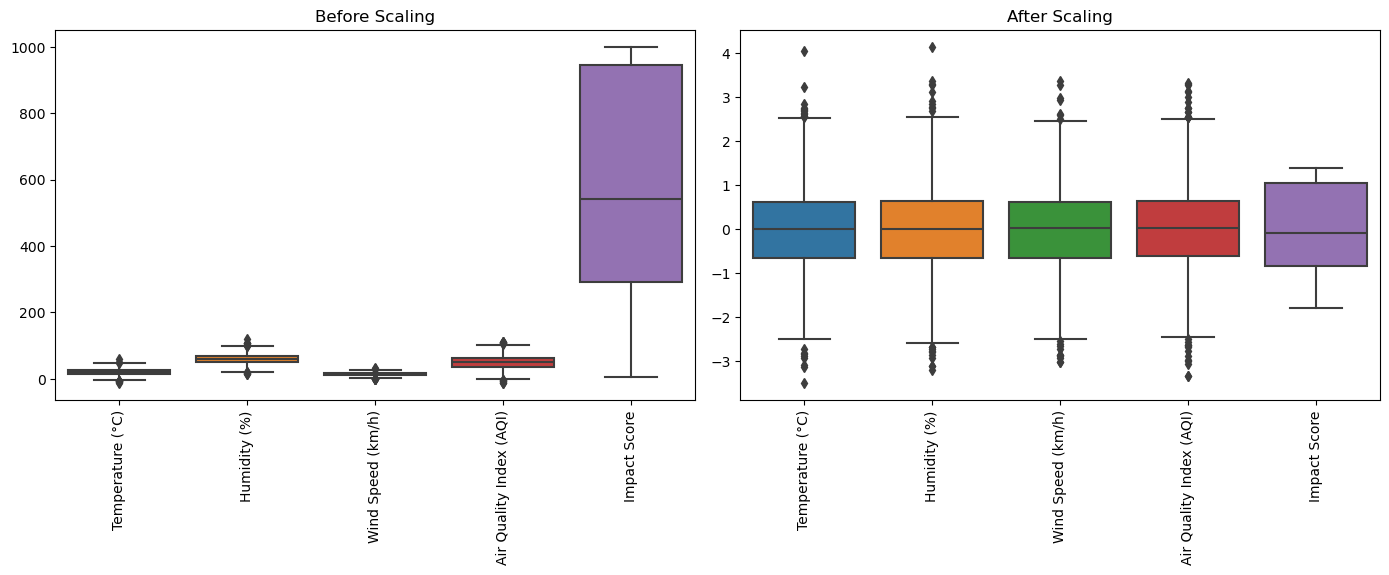

In [52]:
# Visualize scaling effects
plt.figure(figsize=(14, 15))
plt.subplot(3, 2, 3)
sns.boxplot(data=environmental_data[['Temperature (°C)', 'Humidity (%)', 'Wind Speed (km/h)', 'Air Quality Index (AQI)', 'Impact Score']])
plt.title('Before Scaling')
plt.xticks(rotation=90)

plt.subplot(3, 2, 4)
sns.boxplot(data=environmental_data_scaled[['Temperature (°C)', 'Humidity (%)', 'Wind Speed (km/h)', 'Air Quality Index (AQI)', 'Impact Score']])
plt.title('After Scaling')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Split The Data

In [55]:
# Split the data into features and target
X = environmental_data_scaled.drop(columns=['Impact Score', 'Date'])
y = environmental_data_scaled['Impact Score']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 5), (293, 5), (1168,), (293,))

# Develop a Predictive Model 

In [56]:
# Evaluate model performance
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    return mae, rmse, y_test, y_pred

In [57]:
# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

In [70]:
# Evaluate models
results = {}
predictions = {}
for model_name, model in models.items():
    mae, rmse, y_test, y_pred = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[model_name] = {'MAE': mae, 'RMSE': rmse}
    predictions[model_name] = {'y_test': y_test, 'y_pred': y_pred}

In [68]:
# Peint the results
results_df = pd.DataFrame(results).T
results_df

,MAE,RMSE
Linear Regression,0.855952,0.991035
Random Forest,0.366940,0.528534
Gradient Boosting,0.370659,0.524502


> ### `Random Forest` has the lowest MAE (0.366940) so it makes the smallest average error in predictions
> ### `Gradient Boosting` has the lowest RMSE (0.524502) so it has the smallest average squared error in predictions.

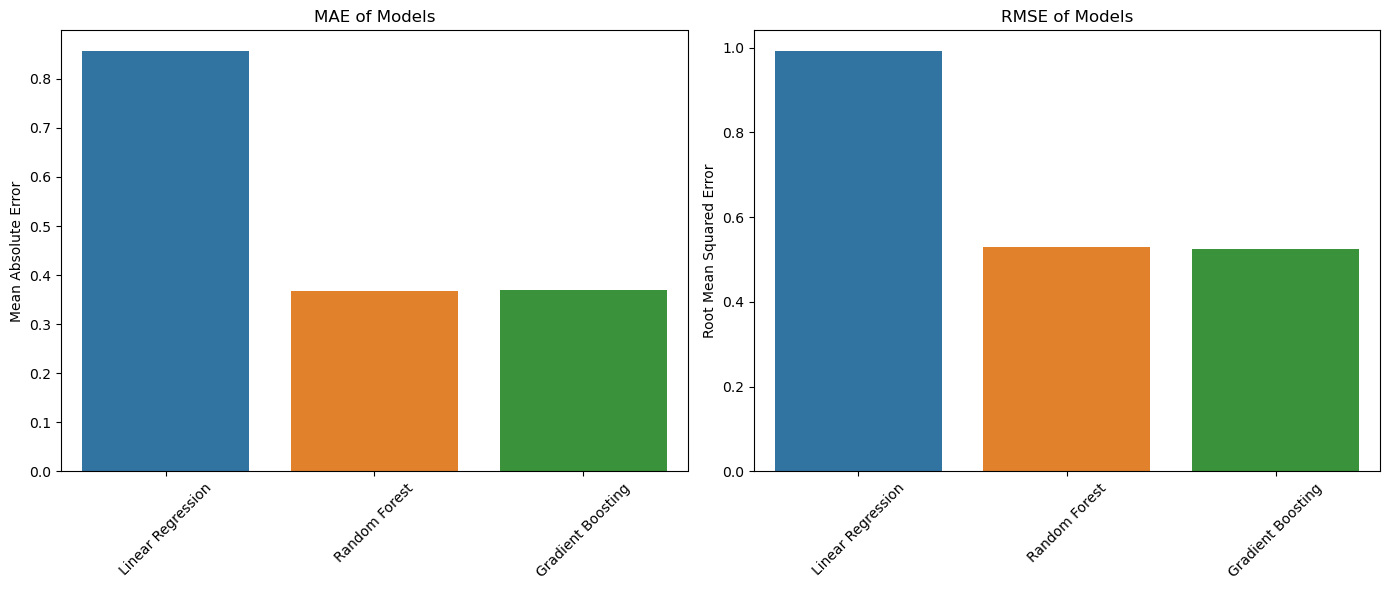

In [60]:
# Plot MAE and RMSE for each model
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=results_df.index, y=results_df['MAE'])
plt.title('MAE of Models')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=results_df.index, y=results_df['RMSE'])
plt.title('RMSE of Models')
plt.ylabel('Root Mean Squared Error')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [61]:
# Cross-Validation for more reliable performance estimates
cv_results = {}
for model_name, model in models.items():
    mae_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=5)
    rmse_scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5))
    
    cv_results[model_name] = {
        'CV MAE Mean': -mae_scores.mean(),
        'CV MAE Std': mae_scores.std(),
        'CV RMSE Mean': rmse_scores.mean(),
        'CV RMSE Std': rmse_scores.std()
    }

In [62]:
# Display cross-validation results
cv_results_df = pd.DataFrame(cv_results).T
cv_results_df

,CV MAE Mean,CV MAE Std,CV RMSE Mean,CV RMSE Std
Linear Regression,0.875760,0.053417,1.000992,0.046740
Random Forest,0.353130,0.011455,0.523442,0.018392
Gradient Boosting,0.354361,0.016238,0.510936,0.020788


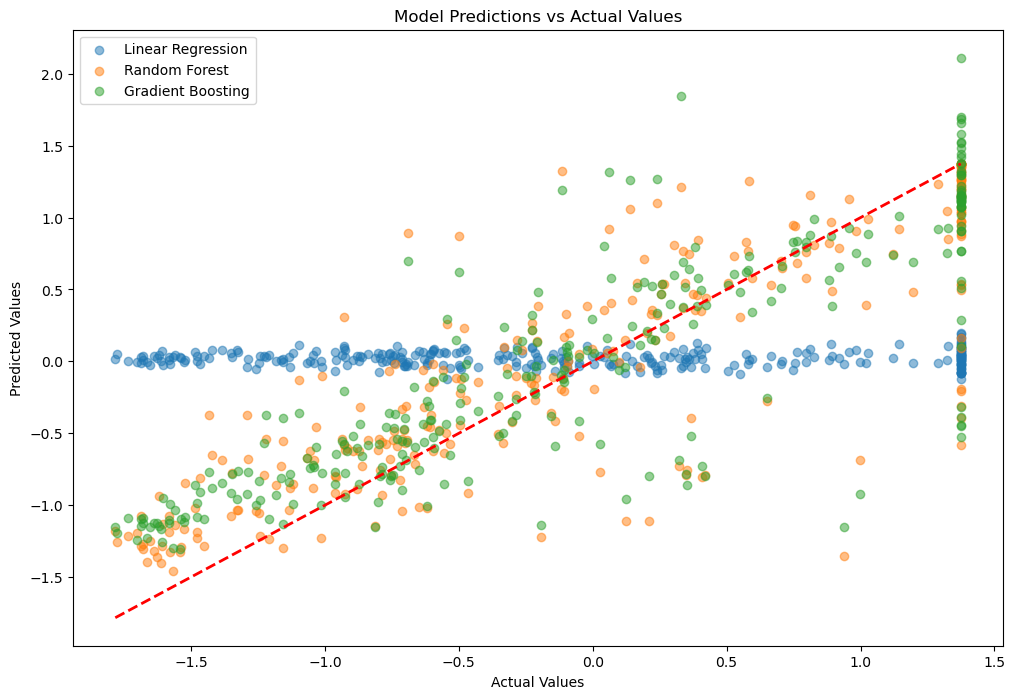

In [75]:
# Mobel (Prediction VS Axtual values) plot
plt.figure(figsize=(12, 8))

for model_name, preds in predictions.items():
    plt.scatter(preds['y_test'], preds['y_pred'], alpha=0.5, label=model_name)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model Predictions vs Actual Values')
plt.legend()
plt.show()

> ### The Best Model That Give Minimum RMSR Is `Gradient Boosting`

# Features Contribute For `Gradient Boosting`

In [76]:
# Get Feature Importances
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_importances = gb_model.feature_importances_

In [78]:
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Gradient Boosting Importance': gb_importances
}).set_index('Feature')

## Show  Feature Importances
importance_df

,Gradient Boosting Importance
Feature,
Temperature (°C),0.085215
Humidity (%),0.318133
Wind Speed (km/h),0.010860
Air Quality Index (AQI),0.583619
Month,0.002173


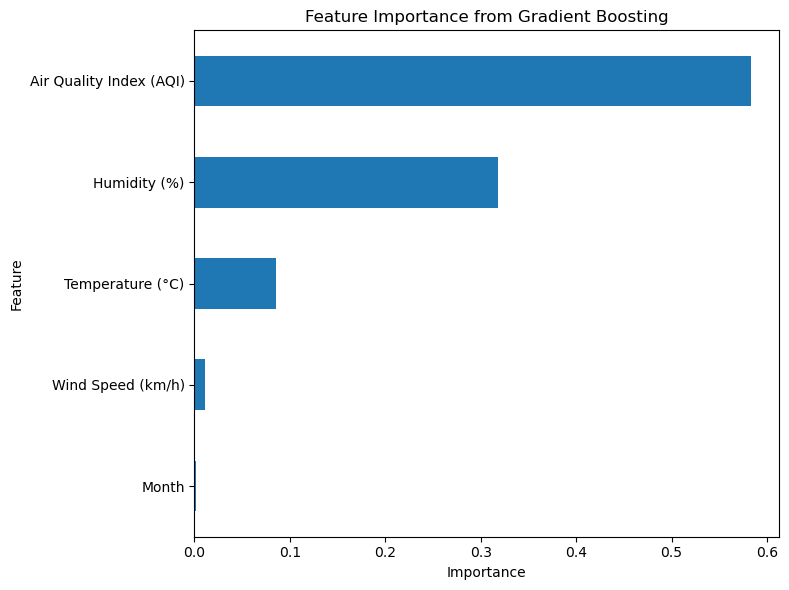

In [79]:
# Plot the feature importances
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 2)
importance_df['Gradient Boosting Importance'].sort_values().plot(kind='barh')
plt.title('Feature Importance from Gradient Boosting')
plt.xlabel('Importance')

plt.tight_layout()
plt.show()

> ### The Most Important Feature For `Gradient Boosting` Is `Air Quality Index (AQI)`

# Hyperparameter Tuning For `GradientBoostingRegressor`

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [82]:
# Initialize the GridSearchCV with GradientBoostingRegressor
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,  
                           n_jobs=-1, 
                           scoring='neg_mean_squared_error') 

In [83]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [84]:
# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [85]:
print(f"Best parameters found: {best_params}")

Best parameters found: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


> ### `Best parameters found`: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}

In [86]:
print(f"Best Model found: {best_model}")

Best Model found: GradientBoostingRegressor(min_samples_leaf=4, min_samples_split=10,
                          random_state=42)


In [90]:
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [91]:
print(f"MAE of the best model: {mae}")
print(f"RMSE of the best model: {rmse}")

MAE of the best model: 0.36982195745730373
RMSE of the best model: 0.5198396305330185


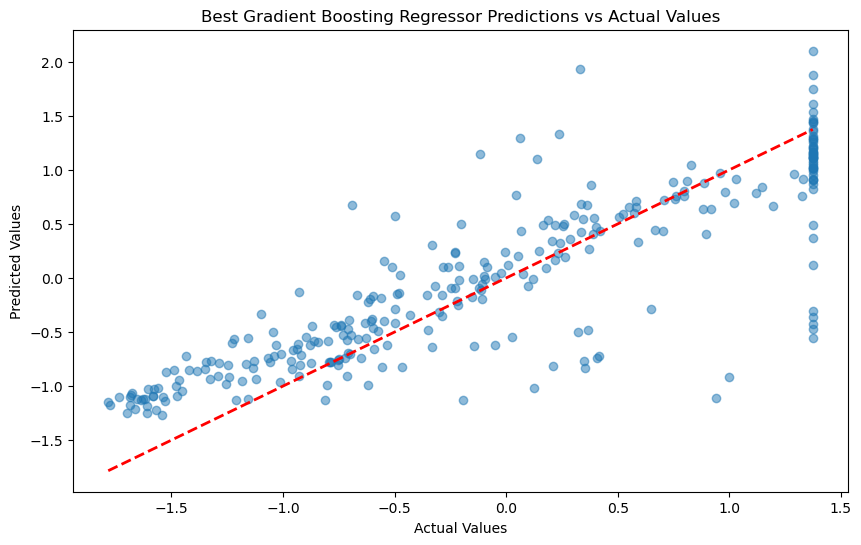

In [92]:
# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Best Gradient Boosting Regressor Predictions vs Actual Values')
plt.show()

> ### The Best Parameters that Make the `Gradient Boosting Regressor` Go Down Is
> ### `GradientBoostingRegressor`(min_samples_leaf=4, min_samples_split=10, random_state=42)